In [0]:
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(0)

##Sampling data

In [0]:
c1 = []
c2 = []
n = 100
for i in range(n):
  c1.append(np.random.uniform(-1,1))
  turn = np.random.choice((0,1))
  if turn == 0:
    c2.append(np.random.uniform(-3,-2))
  else:
    c2.append(np.random.uniform(2,3)) 

##calculating alphas

$$\alpha_i = N^{-1}(M_2 - M_1)$$

$$N\ can\ be\ singular\ use\ N_\epsilon = N + \epsilon I$$

$$N = K_1(I-1_{l_1})K_1^T + K_2(I-1_{l_2})K_2^T$$

$$1^{st}\ I\  is\ l_1*l_1\ 2^{nd}\ I\ is\ l_2*l_2$$

$$K_1[n][m]= k(x_n,x_m^1);\ l*l_1\ matrix$$

$$K_2[n][m]= k(x_n,x_m^2);\ l*l_2\ matrix$$ 

$$M_1\ is\ l*1;\ M_1[j]=\frac{1}{l_1}\sum_{k=1}^{l_1}k(x_j,x_k^1)$$

$$M_2\ is\ l*1;\ M_2[j]=\frac{1}{l_2}\sum_{k=1}^{l_2}k(x_j,x_k^2)$$


In [0]:
x = c1+c2

In [379]:
len(x)

200

In [0]:
def gaussian_kernel(x1,x2,sigma=1):
  answer = -0.5*((x1-x2)**2)
  return float(np.exp(answer/(sigma**2)))

In [0]:
def polynomial_kernel(x1,x2,d=2,b=1):
  return((b+x1*x2)**d)

###calculating M1 and M2

In [0]:
M1 = np.zeros((200,1))
M2 = np.zeros((200,1))

for i in range(200):
  sum1 = 0.0
  for j in range(100):
    sum1 = sum1 + gaussian_kernel(x[i],c1[j])
  sum1 = sum1/100
  M1[i][0] = sum1


for i in range(200):
  sum2 = 0.0
  for j in range(100):
    sum2 = sum2 + gaussian_kernel(x[i],c2[j])
  sum2 = sum2/100
  M2[i][0] = sum2

###Calculating K1, K2, I1, I2, onel1, onel2

In [0]:
K1 = np.zeros((200,100))
K2 = np.zeros((200,100))

for i in range(200):
  for j in range(100):
    K1[i][j] = gaussian_kernel(x[i],c1[j])
    K2[i][j] = gaussian_kernel(x[i],c2[j])

I1 = np.eye(100)
I2 = np.eye(100)

onel1 = np.ones((100,100))/n
onel2 = np.ones((100,100))/n


In [384]:
onel1

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])

###Calculating N : $$N = K_1(I-1_{l_1})K_1^T + K_2(I-1_{l_2})K_2^T$$ 

In [0]:
term1 = np.matmul(K1,(I1-onel1))
term2 = np.matmul(term1,K1.T)
term3 = np.matmul(K2,(I2-onel2))
term4 = np.matmul(term3,K2.T)

N = term2+term4


### making $$N_\epsilon = N +\epsilon I$$ 

In [0]:
epsilon = 0.001
N = N + epsilon*np.eye(200,200)

In [0]:
term5 = np.linalg.inv(N)
alphas = np.matmul(term5,(M2-M1))

Text(0.5, 0.98, 'alpha value at gaussian kernel sigma = 100, misclassification = 0')

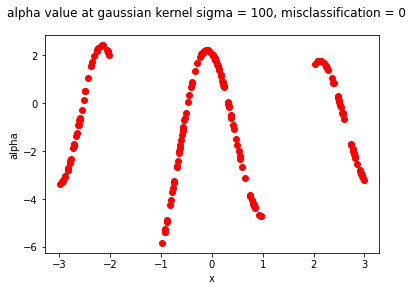

In [388]:
plt.scatter(x,alphas,color = 'red')
plt.xlabel('x')
plt.ylabel('alpha')
plt.suptitle('alpha value at gaussian kernel sigma = 100, misclassification = 0')
#plt.savefig('5d9.png')

###Calculating y for each x given by : 
$$y(x) = \sum_{i=1}^{l}k(x_i,x)$$


In [0]:
y = []
for i in range(len(x)):
  temp_sum = 0.0
  for j in range(len(x)):
    temp_sum = temp_sum+gaussian_kernel(x[j],x[i])
  y.append(temp_sum)

In [0]:
mean_y = sum(y)/len(y)

In [0]:
y_pred = []
for i in range(200):
  if(y[i]<=mean_y):
    y_pred.append(-1.0)
  else:
    y_pred.append(1.0)

In [0]:
y_true = [1.0]*100 + [-1.0]*100

In [393]:
total_misclassified = 0
for i in range(100):
  if y_pred[i]==-1.0:
    total_misclassified = total_misclassified+1
for i in range(100,200):
  if y_pred[i]==1.0:
    total_misclassified = total_misclassified+1
  
print(total_misclassified)

0


In [394]:
#y_pred

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 

In [395]:
mean_y

70.29838223007266

In [396]:
min(y)

46.11870737756886

In [397]:
max(y)

91.67676189931193

Text(0.5, 0.98, 'Projected values of the points,gaussian kernel sigma = 100, misclassification = 0')

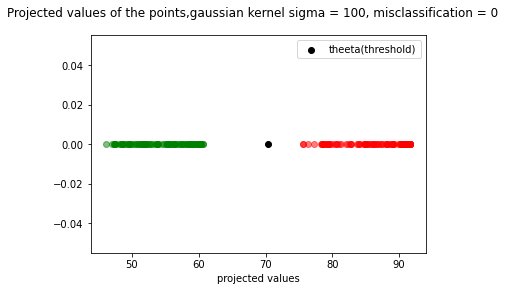

In [398]:
for i in range(100):
  
  plt.scatter(y[i],y=0,color='red',alpha=0.5)
  plt.scatter(y[i+100],y=0,color='green',alpha=0.5)
plt.scatter(mean_y,y=0,color='black',alpha=1.0,label='theeta(threshold)')
plt.xlabel('projected values')
plt.legend()
plt.suptitle('Projected values of the points,gaussian kernel sigma = 100, misclassification = 0')
#plt.savefig('5d10.png')

In [399]:
max(y)

91.67676189931193

In [400]:
min(y)

46.11870737756886

In [401]:
#M1

array([[0.77827163],
       [0.79084172],
       [0.86715252],
       [0.81761741],
       [0.73851577],
       [0.6503653 ],
       [0.8497137 ],
       [0.82345437],
       [0.78279561],
       [0.69010875],
       [0.74572399],
       [0.86434824],
       [0.86606636],
       [0.85042698],
       [0.64473849],
       [0.64448174],
       [0.71956634],
       [0.85577977],
       [0.85994868],
       [0.82999674],
       [0.84603794],
       [0.70756343],
       [0.84784565],
       [0.68865472],
       [0.77432597],
       [0.86633879],
       [0.84835507],
       [0.78935579],
       [0.82669556],
       [0.84892393],
       [0.61349196],
       [0.73012458],
       [0.85832231],
       [0.84766864],
       [0.76224378],
       [0.65960827],
       [0.86830933],
       [0.69216919],
       [0.86748983],
       [0.86133437],
       [0.7548259 ],
       [0.74945993],
       [0.8282176 ],
       [0.66691439],
       [0.86301129],
       [0.76767427],
       [0.67919676],
       [0.839

In [402]:
#print(alphas)


[[-1.16776949]
 [-1.4898294 ]
 [ 2.22392464]
 [-0.53828602]
 [-2.6740472 ]
 [-5.24738589]
 [ 0.87488423]
 [ 0.68005617]
 [-0.98697112]
 [-4.23928253]
 [-2.41369214]
 [ 2.18603105]
 [ 1.84822537]
 [ 0.91136613]
 [-5.36768415]
 [-5.37303527]
 [-3.32670169]
 [ 1.9374217 ]
 [ 2.07089487]
 [-0.03650496]
 [ 0.69160114]
 [-3.71432259]
 [ 0.78079167]
 [-3.89575451]
 [-1.32415402]
 [ 2.218802  ]
 [ 1.67167662]
 [-0.72225901]
 [-0.17477022]
 [ 0.83485372]
 [-4.66463305]
 [-3.1249961 ]
 [ 2.02076425]
 [ 0.77197968]
 [-2.3413044 ]
 [-4.28550648]
 [ 2.20708123]
 [-3.84039812]
 [ 2.2233399 ]
 [ 2.11102338]
 [-2.07623212]
 [-2.67389326]
 [ 0.87534055]
 [-4.19870741]
 [ 1.6298816 ]
 [-2.1913638 ]
 [-4.03584793]
 [ 1.32458926]
 [-5.83589041]
 [ 1.43417455]
 [ 2.02319821]
 [-4.72687659]
 [-3.86534571]
 [-0.89490763]
 [ 0.82082191]
 [ 1.97178864]
 [-1.99095789]
 [-0.6413371 ]
 [ 1.1635323 ]
 [-1.09137906]
 [ 2.21101133]
 [-4.168719  ]
 [-1.8815338 ]
 [ 0.34572484]
 [-2.62243492]
 [-4.04863595]
 [-0.42822

In [403]:
#y

[86.11704725161327,
 86.54392754252189,
 91.60092416458045,
 88.24866974278879,
 83.75744264687695,
 78.81399741909985,
 90.3555397502078,
 88.88432622016374,
 86.39024882178653,
 80.99119997262102,
 84.17960196031636,
 91.43340898307706,
 91.4740853296552,
 90.40334464251185,
 78.51289335632472,
 78.49919727538376,
 82.66009840471295,
 90.90315829426959,
 91.16261597739032,
 89.05223196996609,
 90.11002336062654,
 81.97456293535964,
 90.23059671262314,
 80.43275412998011,
 85.8795274647493,
 91.5532153690721,
 90.4388786988211,
 86.7880341580567,
 88.83693535098277,
 90.30267176769145,
 76.35033756030573,
 82.83728118036382,
 91.06159078346514,
 90.21877585634633,
 84.77082844403182,
 78.81199704418815,
 91.66486222209855,
 80.63244266686908,
 91.62027125717738,
 91.24839838289186,
 84.71631514163923,
 83.99389935896008,
 89.18055319967911,
 79.21465150418295,
 91.25924328716532,
 85.10379344101732,
 79.89918197360363,
 89.87619807436826,
 77.1813348818593,
 91.04471872222119,
 91.066